In [17]:
"""
Necessary Comment : jupyter notebook
"""

'\nNecessary Comment : jupyter notebook\n'

In [18]:
"""
Necessary Lighbary
"""
import sqlite3
import pandas as pd
import talib
import mplfinance as mpl

In [19]:
"""
Database Connection
"""
connection = sqlite3.connect(r"C:/Users/user/PycharmProjects/TradingAi/cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

In [20]:
"""
Dataframe
"""
df = pd.DataFrame(database_data)

In [21]:
"""
Name Columns
"""
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df['HAMMER'] = talib.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Close'])
df['MA7'] = talib.MA(df['Close'], timeperiod=int(7), matype=0)
df['MA25'] = talib.MA(df['Close'], timeperiod=int(25), matype=0)
df['MA90'] = talib.MA(df['Close'], timeperiod=int(90), matype=0)
df['MA200'] = talib.MA(df['Close'], timeperiod=int(200), matype=0)
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='ms')
df['MA7=MA25'] = abs(df['MA7'] - df['MA25']) <= 0.1
df['MA25=MA90'] = abs(df['MA25'] - df['MA90']) <= 0.1
df['MA90=MA7'] = abs(df['MA90'] - df['MA7']) <= 0.1


In [22]:
"""
Candle Data Column
"""
df = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC','MA7']]


In [23]:
"""
Time Indexing
"""
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')


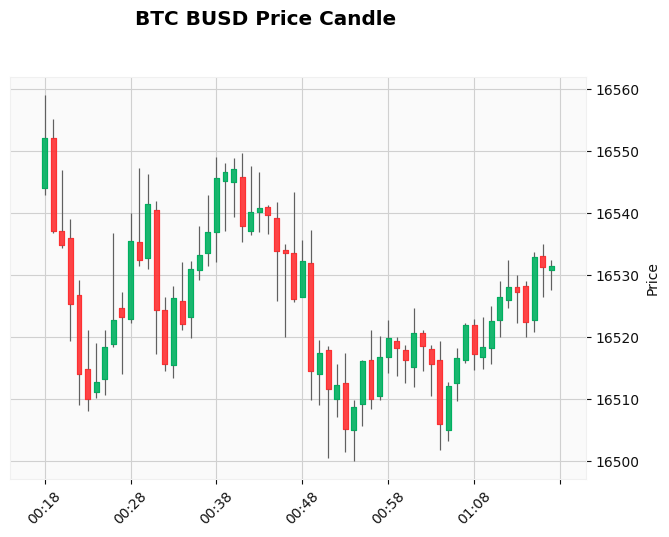

In [24]:
df = df.tail(60)
mpl.plot(
    df,
    type="candle",
    title=f"BTC BUSD Price Candle",
    style="yahoo",
)

In [63]:
"""
Necessary Columns
"""
df['HAMMER'] = talib.CDLHAMMER(df['Open'], df['High'], df['Low'], df['Close'])
df['MA7'] = talib.MA(df['Close'], timeperiod=int(7), matype=0)
df['MA25'] = talib.MA(df['Close'], timeperiod=int(25), matype=0)
df['MA90'] = talib.MA(df['Close'], timeperiod=int(90), matype=0)
df['MA200'] = talib.MA(df['Close'], timeperiod=int(200), matype=0)
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='ms')
df['MA7=MA25'] = abs(df['MA7'] - df['MA25']) <= 0.1
df['MA25=MA90'] = abs(df['MA25'] - df['MA90']) <= 0.1
df['MA90=MA7'] = abs(df['MA90'] - df['MA7']) <= 0.1
df = df.iloc[:, 6:]
# df = df[['CloseTime', 'Trades', 'HAMMER','MA7','MA25','MA90', 'MA7=MA25', 'MA25=MA90', 'MA90=MA7']]
df.head(60)

KeyError: 'CloseTime'

In [ ]:
"""
X value for DecisionTreeClassifier
"""
X = df.drop(columns=['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'BuyQuoteVolume', 'Time'])
X

In [ ]:
# Moving Average
real = talib.MA(df['Close'], timeperiod=int(9), matype=0)
# real

In [ ]:
"""
y value for DecisionTreeClassifier
"""
# Find Candle Pattern
candle_pattern = talib.CDLHAMMER(df['Open'], df['High'], df['Low'],
                                         df['Close'])
y = candle_pattern.head(60)
y

In [ ]:
"""
Model for AI Research
"""
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

In [ ]:
model.fit(X, y)

In [ ]:
# model.predict([  [40, 0],[60, 1] ])